# H1 Tire Tread vs Mileage
## Q3.a

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x=np.array([0,4,8,12,16,20,24,28,32])
y=np.array([394.33,329.50,291.00,255.17,229.33,204.83,179.00,163.83,150.33])

In [17]:
x_average=np.mean(x)
y_average = round(np.mean(y),2)

In [18]:
# raw formulas
Sxy=0
Sxx=0
for i in range(0,9):
    Sxy=Sxy+(x[i]-x_average)*(y[i]-y_average)

for i in range(0,9):
    Sxx=Sxx+(x[i]-x_average)**2
    
Sxy=round(Sxy,2)
Sxx=round(Sxx,2)

b1_hat=round(Sxy/Sxx,3)
b0_hat=round(y_average-b1_hat*x_average,3)

In [20]:
# Linear Regression Function
def function_a(x):
    return b0_hat+b1_hat*x
y_a_pred=function_a(x)
print("y=%.3f%.3f*x"% (b0_hat, b1_hat))

y=360.646-7.281*x


__Linear Regression Function: y=360.646-7.281*x__

In [21]:
# calculate error performance
Q=0
for i in range(0,9):
    Q=Q+(y[i]-function_a(x[i]))**2
print(round(Q,3))

2531.53


__Error performance: The sum of squared errors = 2531.53__
## Q3.b

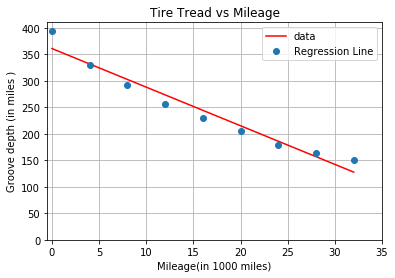

In [22]:
plt.plot(x,function_a(x),'r-',x,y,'o')
plt.xlim(-0.5,35)
plt.ylim(0,410)
plt.legend(["data","Regression Line"])
plt.title("Tire Tread vs Mileage")
plt.xlabel("Mileage(in 1000 miles)")
plt.ylabel("Groove depth (in miles )")
plt.grid()

__I think it is not a good fit.__
## Q3.c

In [23]:
x_average=np.mean(x[0:8])
y_average = round(np.mean(y[0:8]),3)
Sxy=0
Sxx=0
for i in range(0,8):
    Sxy=Sxy+(x[i]-x_average)*(y[i]-y_average)

    
for i in range(0,8):
    Sxx=Sxx+(x[i]-x_average)**2
    
Sxy=round(Sxy,2)
Sxx=round(Sxx,2)

b1_hat=round(Sxy/Sxx,3)
b0_hat=round(y_average-b1_hat*x_average,3)

def function_c(x):
    return b0_hat+b1_hat*x
y_c_pred=function_c(x[0:8])
print("y=%.3f%.3f*x"% (b0_hat, b1_hat))

y=366.306-7.888*x


__Linear Regression Function: y=366.306-7.888*x__

In [24]:
y_test = function_c(32)
error=150.33-y_test
print("Predicted Y9=%f, true Y9=%f"%(y_test,150.33))
print("Training error:",round(error,3))
      
Q=0
for i in range(0,8):
    Q=Q+(y[i]-function_c(x[i]))**2
print("The sum of squared errors:",round(Q,3))

Predicted Y9=113.890000, true Y9=150.330000
Training error: 36.44
The sum of squared errors: 1705.329


__Training error(test error): 36.44. The sum of squared errors: 1705.329__

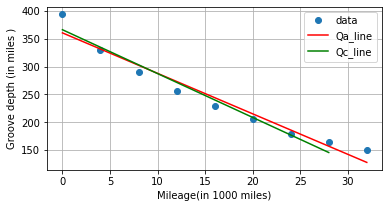

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x,y,'o')
ax.plot(x,y_a_pred,'r')
ax.plot(x[0:8],y_c_pred,'g')
plt.legend(["data","Qa_line","Qc_line"])
plt.xlabel("Mileage(in 1000 miles)")
plt.ylabel("Groove depth (in miles )")
plt.grid()

## Q3.d

Coefficients, degree 1:
	 -7.28 360.64
       The sum of squared errors:  2531.529425
Coefficients, degree 5:
	 -0.00 0.00 -0.07 1.35 -20.35 394.18
       The sum of squared errors:  15.1582309
Coefficients, degree 7:
	 0.00 0.00 -0.00 0.01 -0.13 1.81 -21.56 394.25
       The sum of squared errors:  7.4868304
Coefficients, degree 8:
	 -0.00 0.00 -0.00 0.00 -0.03 0.33 -0.69 -17.05 394.33
       The sum of squared errors:  0.0
Coefficients, degree 9:
	 0.00 -0.00 0.00 -0.00 0.00 -0.11 1.46 -7.36 -3.84 394.33
       The sum of squared errors:  0.0


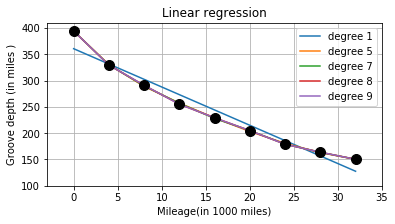

In [26]:
import scipy.stats as st
import sklearn.linear_model as lm
x=[0,4,8,12,16,20,24,28,32]
y=[394.33,329.50,291.00,255.17,229.33,204.83,179.00,163.83,150.33]

lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

for deg, s in zip([1,5,7,8,9],['-','-','-','-','-']):
    lrp.fit(np.vander(x,deg + 1), y)
    y_lrp = lrp.predict(np.vander(x, deg + 1))
    ax.plot(x, y_lrp, s,label=f'degree {deg}')
    ax.legend(loc='best')
    ax.set_xlim(-3, 35)
    ax.set_ylim(100, 410)
    coeff=np.append(lrp.coef_[:-1],lrp.intercept_)
    print(f'Coefficients, degree {deg}:\n\t',' '.join(f'{c:.2f}' for c in coeff ))
    Q=0
    for i in range(0,9):
        Q=Q+(y[i]-y_lrp[i])**2
    print(f'       The sum of squared errors: ',round(Q,7))
    
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")
ax.set_xlabel("Mileage(in 1000 miles)")
ax.set_ylabel("Groove depth (in miles )")
ax.grid()

__Linear Regression Function with Scikit-learn: y=0.01x^4-0.13x^3+1.81x^2-21.56x+394.25__  
__For degree 8/9, maybe the fit is overfitting. The model of degree 8/9 maybe fit the noise.__

__The sum of squared errors of the linear regression function (degree 7) with Scikit-learn is much less than Q3.a model (degree 1).__

__The reason why they are different: The data points maybe fit to a nonlinear model.__